### Build MAT+yolo model

In [1]:
import torch
from torchvision.io import read_image
import matplotlib.pyplot as plt

/media/nnthao/miniconda3/envs/mat_inpainting/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
res = 4
(torch.arange(res**2).reshape(res, res)[None, None, ...] / (res**2 - 1)).to(device)

tensor([[[[0.0000, 0.0667, 0.1333, 0.2000],
          [0.2667, 0.3333, 0.4000, 0.4667],
          [0.5333, 0.6000, 0.6667, 0.7333],
          [0.8000, 0.8667, 0.9333, 1.0000]]]])

In [2]:
!python networks/mat.py

Traceback (most recent call last):
  File "networks/mat.py", line 12, in <module>
    from torch_utils import misc
ModuleNotFoundError: No module named 'torch_utils'


### Take coor, show img

In [1]:
import torch
# from matplotlib import pyplot as plt
import numpy as np
import cv2

/media/nnthao/miniconda3/envs/mat_inpainting/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/media/nnthao/yolov5/runs/train/exp-mask/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/nnthao/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-14 Python-3.8.18 torch-1.8.0+cu111 CPU

Fusing layers... 
Model summary: 267 layers, 46189053 parameters, 0 gradients, 107.9 GFLOPs
Adding AutoShape... 


In [3]:
class_names = model.names
print(class_names)

{0: 'ear', 1: 'eye', 2: 'nose', 3: 'mouth', 4: 'car', 5: 'meatballs', 6: 'marinara sauce', 7: 'tomato soup', 8: 'chicken noodle soup', 9: 'french onion soup', 10: 'chicken breast', 11: 'ribs', 12: 'pulled pork', 13: 'hamburger', 14: 'cavity', 15: 'face'}


In [4]:
def create_label_file(image_path, label_path, boxes):
    with open(label_path, 'w') as file:
        for box in boxes:
            class_idx, x_center, y_center, width, height = box
            class_name = class_names[class_idx]
            line = f"{class_name} {x_center} {y_center} {width} {height}\n"
            file.write(line)

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# mpimg.imsave('/home/nnthao/project/FDA/test_sets/CelebA-HQ/masked_images/test1.png', mpimg.imread('/home/nnthao/project/FDA/test_sets/CelebA-HQ/images/test1.png') * mpimg.imread('/home/nnthao/project/FDA/test_sets/CelebA-HQ/masks/mask1.png')[..., np.newaxis])
# mpimg.imsave('/home/nnthao/project/FDA/test_sets/CelebA-HQ/masked_images/test2.png', mpimg.imread('/home/nnthao/project/FDA/test_sets/CelebA-HQ/images/test2.png') * mpimg.imread('/home/nnthao/project/FDA/test_sets/CelebA-HQ/masks/mask2.png')[..., np.newaxis])

In [6]:
# image_path = './data/ntp/a1.jpg
image_path = '/home/nnthao/project/FDA/test_sets/CelebA-HQ/masked_images/test1.png'
label_path = './data/ntp/label.txt'

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 512x512 2 ears, 2 eyes, 1 nose, 1 mouth
Speed: 431.9ms pre-process, 11606.7ms inference, 1114.3ms NMS per image at shape (1, 3, 640, 640)


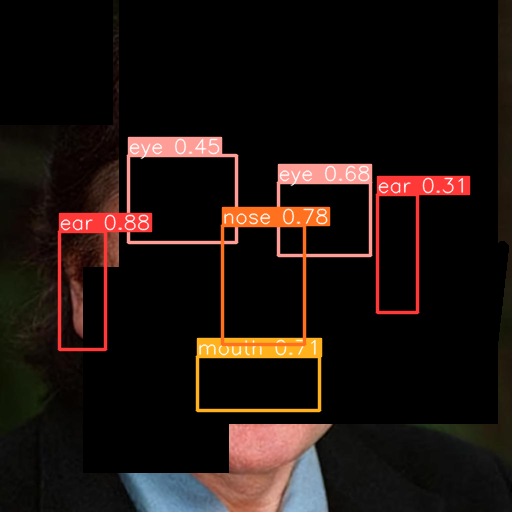

In [22]:
results = model(image_path)
results.print()
results.show()

In [23]:
# print class names and positions
print(results.xyxy[0][:, -1])
print(results.xyxy[0][:, 0:4])


tensor([0., 2., 3., 1., 1., 0.])
tensor([[ 59.46048, 231.05176, 105.89915, 349.93033],
        [222.72217, 225.37161, 304.35785, 344.18649],
        [197.93503, 356.88580, 319.36029, 410.85345],
        [278.59213, 182.92589, 370.91098, 255.61462],
        [128.28938, 155.77847, 236.63823, 242.45566],
        [377.27646, 194.21913, 417.30215, 312.14267]])
